In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.api import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings('ignore')

# Task 1:Data Preprocessing

# Load and transform the data. set the data column as the index column and visualize the sales values.

In [81]:
df=pd.read_csv("DS3_C1_S2_Store_Item_Sales_Data_Challenge.csv", parse_dates=['date'])
df

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10
...,...,...,...,...
912995,2017-12-27,10,50,63
912996,2017-12-28,10,50,59
912997,2017-12-29,10,50,74
912998,2017-12-30,10,50,62


In [82]:
df=df.set_index('date')
df

,store,item,sales
date,,,
2013-01-01,1,1,13
2013-01-02,1,1,11
2013-01-03,1,1,14
2013-01-04,1,1,13
2013-01-05,1,1,10
...,...,...,...
2017-12-27,10,50,63
2017-12-28,10,50,59
2017-12-29,10,50,74


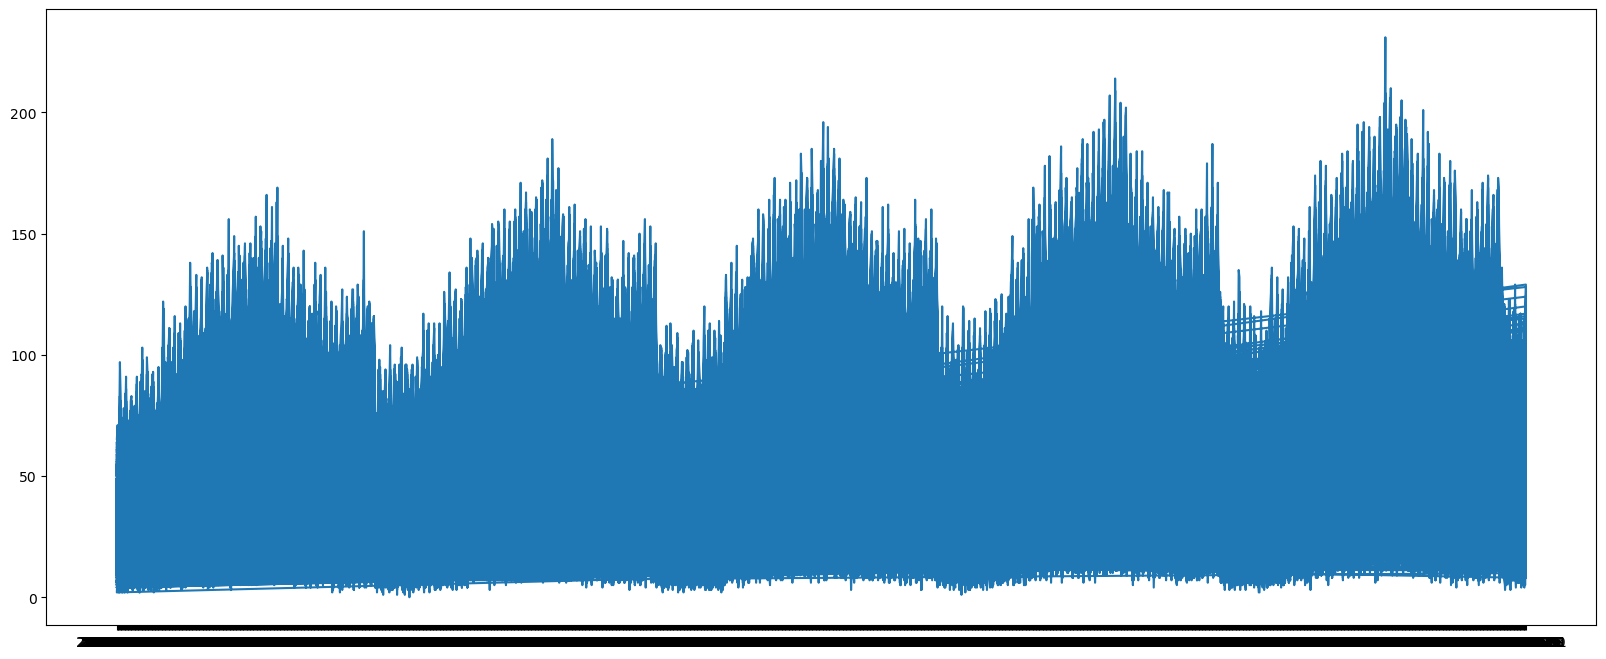

In [72]:
plt.figure(figsize=(20,8))
plt.plot(sales)

# Task 2: Data Decomposition.

# Perfeom data decomposition to visualize the different components of the time series data.

In [83]:
sale = df[['sales']]
sale

,sales
date,
2013-01-01,13
2013-01-02,11
2013-01-03,14
2013-01-04,13
2013-01-05,10
...,...
2017-12-27,63
2017-12-28,59
2017-12-29,74


In [84]:
decomposition = seasonal_decompose(sales,period=365)
d_seasonal = decomposition.seasonal
d_trend = decomposition.trend
d_residual = decomposition.resid

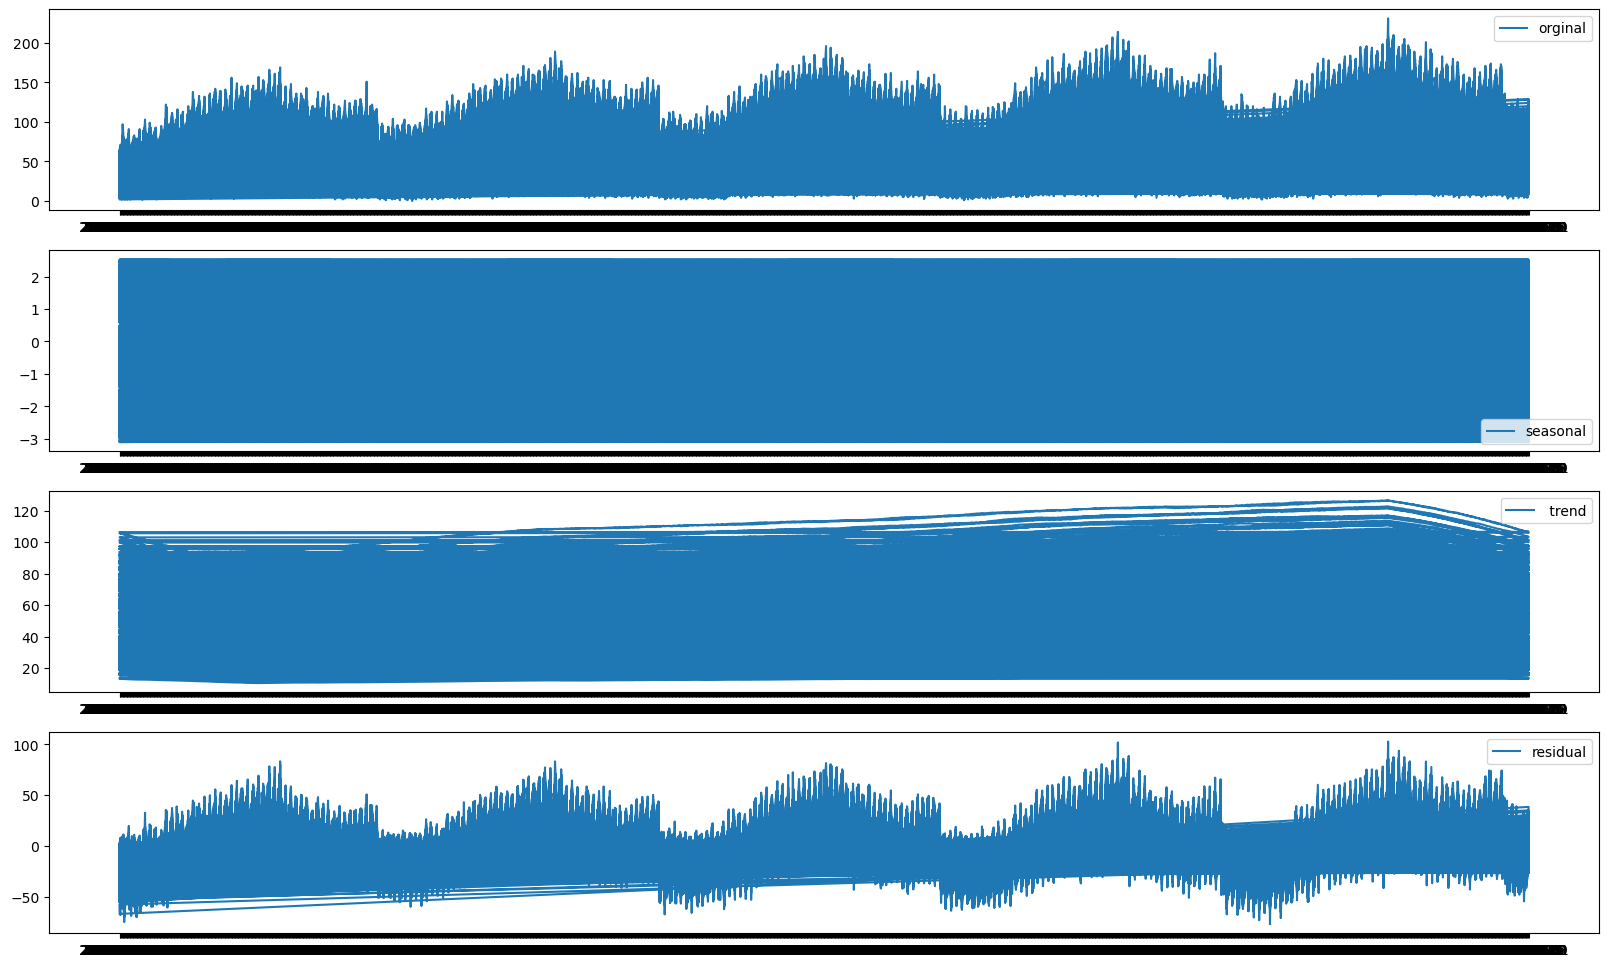

In [51]:
fig,ax = plt.subplots(4,1, figsize= (20,12))

plt.subplot(411)
plt.plot(sales, label= 'orginal')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(d_seasonal,label='seasonal')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(d_trend,label= ' trend')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(d_residual,label='residual')
plt.legend(loc='best')

In the above figure we can see the original series with different time series component. We can see the trend component in which there is a no trend. Seasonal component shows the seasonal pattern in the graph. Residual shows the irregular component.

# Resample sales data with respect to month and fruture decompose the data.Write your observation from vsualization of decomposed data before and after resampling.

In [85]:
resample=df['sales'].resample('M').mean()

In [86]:
resample=pd.DataFrame(resample)
resample

,sales
date,
2013-01-31,29.348645
2013-02-28,32.815500
2013-03-31,39.831097
2013-04-30,45.484933
2013-05-31,49.241419
2013-06-30,53.039800
2013-07-31,55.220774
2013-08-31,49.468452
2013-09-30,45.993800


In [87]:
decomposition2= seasonal_decompose(resample,period=12)
d_seasonal2= decomposition2.seasonal
d_trend2= decomposition2.trend
d_residual2= decomposition2.resid

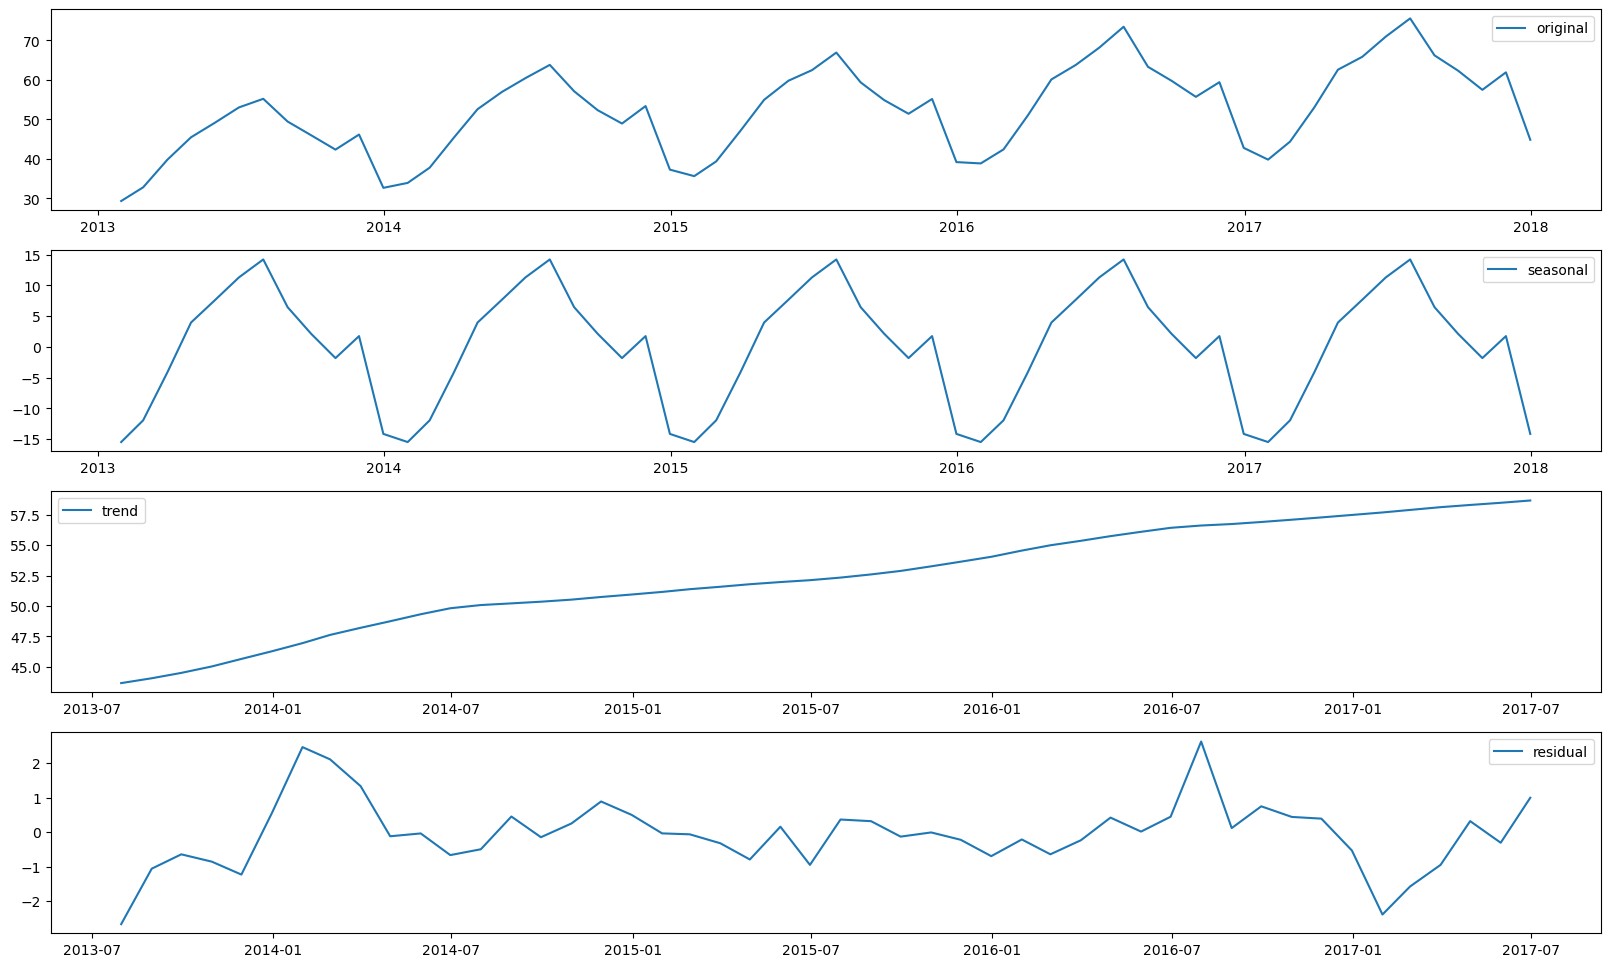

In [88]:
fig , ax = plt.subplots(4,1, figsize=(20,12))

plt.subplot(411)
plt.plot(resample,label= 'original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(d_seasonal2,label= 'seasonal')
plt.legend(loc= 'best')

plt.subplot(413)
plt.plot(d_trend2,label = 'trend')
plt.legend(loc = 'best')

plt.subplot(414)
plt.plot(d_residual2, label= 'residual')
plt.legend(loc = 'best')

In the above figure we can see the after resampling the data series with different time series component. We can see the trend component in which there is a upward trend. Seasonal component shows the seasonal pattern in the graph. Residual shows the irregular component.

# Task 3:Stationarity Check.

In [89]:
from statsmodels.tsa.stattools import adfuller 

In [90]:
def checkStationarity(data):
    pvalue = adfuller(data['sales'])[1]
    print(pvalue)
    
    if pvalue <0.05:
        msg = "pvalue= {}. Data is stationary. Proceed to model Building".format(pvalue)
    else:
        msg = 'pvalue= {}. Data is not stationary. Make the data Stationary before model building'.format(pvalue)
    return msg

In [91]:
checkStationarity(resample)

3.692387626163159e-06


'pvalue= 3.692387626163159e-06. Data is stationary. Proceed to model Building'

# Task 4:Data Smoothing.

# Bulid the models fro simple exponents smoothing for different values of alpha(0,0.2,0.6,0.8).plot the actual and forecasted data and write your interpretion.

In [92]:
def simplesmoothing(data,alpha):
    model = SimpleExpSmoothing(data).fit(smoothing_level=alpha,optimized=False)
    pdct = model.fittedvalues
    df = pd.DataFrame({'actual':data, 'forecast':pdct})
    return(model,df)

In [93]:
data= resample['sales']

In [94]:
# create forecast for different values of alpha. Plot and understand the charts

# dictionary to store the forecast for each alpha
d_simple_exp = {}
alphas = [0, 0.2, 0.6, 0.8]

for a in alphas:
    model, df = simplesmoothing(data,a)
    d_simple_exp[a] = df.forecast

In [95]:
d_simple_exp

{0: date
 2013-01-31    29.348645
 2013-02-28    29.348645
 2013-03-31    29.348645
 2013-04-30    29.348645
 2013-05-31    29.348645
 2013-06-30    29.348645
 2013-07-31    29.348645
 2013-08-31    29.348645
 2013-09-30    29.348645
 2013-10-31    29.348645
 2013-11-30    29.348645
 2013-12-31    29.348645
 2014-01-31    29.348645
 2014-02-28    29.348645
 2014-03-31    29.348645
 2014-04-30    29.348645
 2014-05-31    29.348645
 2014-06-30    29.348645
 2014-07-31    29.348645
 2014-08-31    29.348645
 2014-09-30    29.348645
 2014-10-31    29.348645
 2014-11-30    29.348645
 2014-12-31    29.348645
 2015-01-31    29.348645
 2015-02-28    29.348645
 2015-03-31    29.348645
 2015-04-30    29.348645
 2015-05-31    29.348645
 2015-06-30    29.348645
 2015-07-31    29.348645
 2015-08-31    29.348645
 2015-09-30    29.348645
 2015-10-31    29.348645
 2015-11-30    29.348645
 2015-12-31    29.348645
 2016-01-31    29.348645
 2016-02-29    29.348645
 2016-03-31    29.348645
 2016-04-30    2

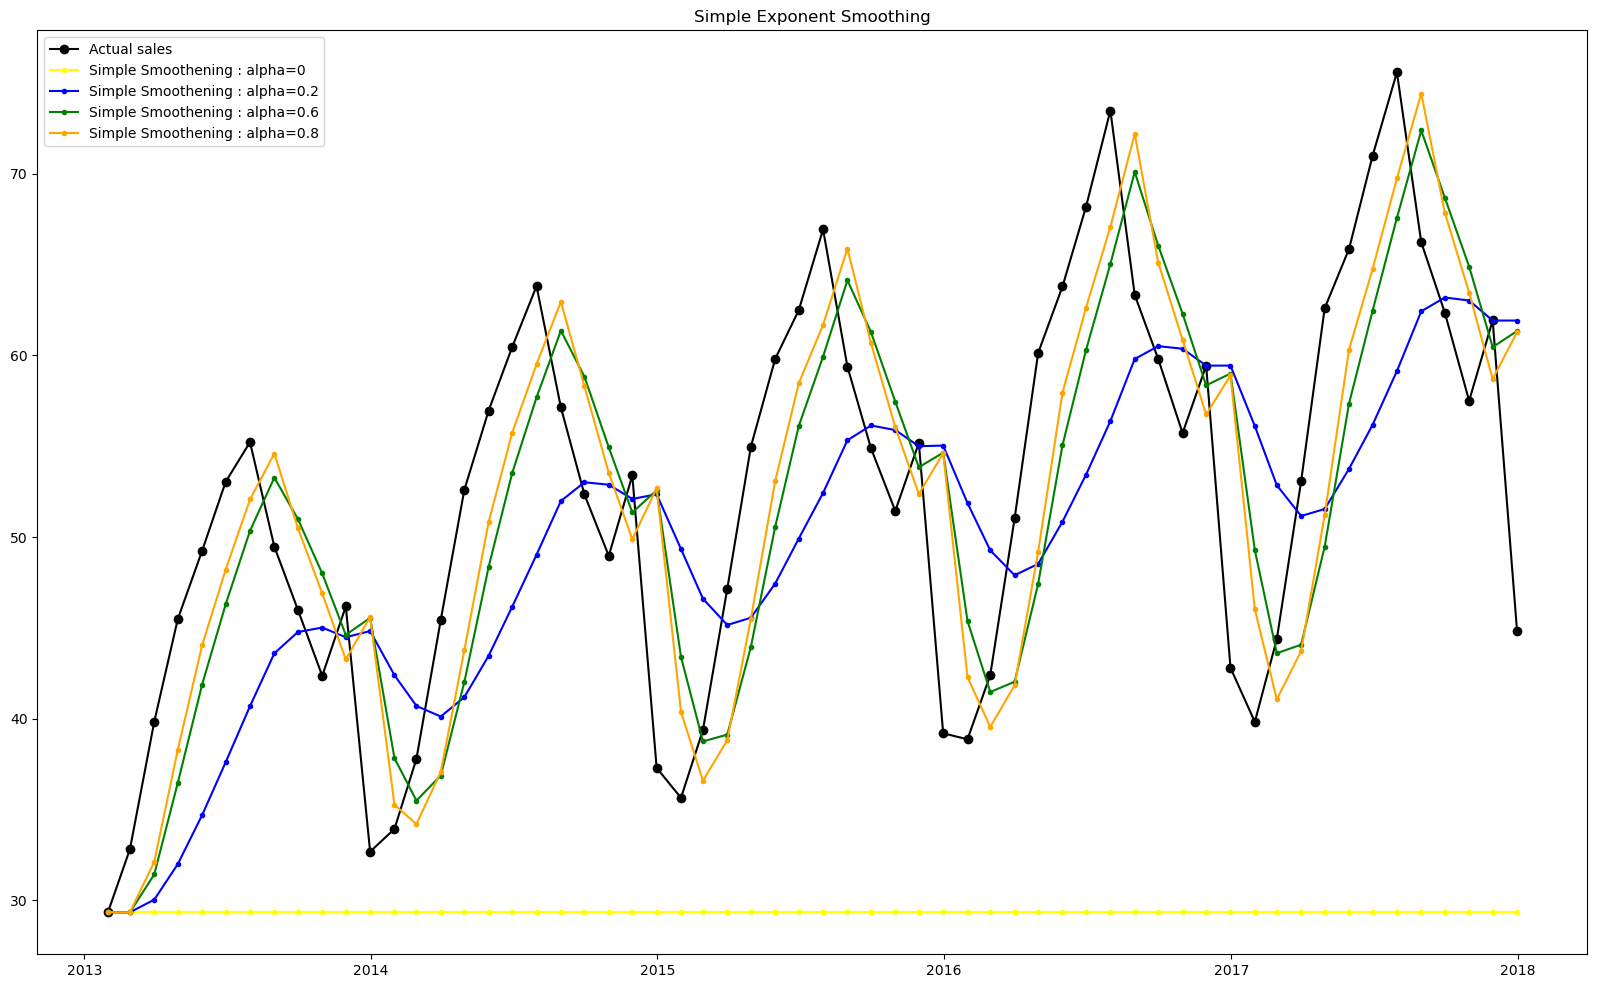

In [96]:
colors = ['yellow','blue','green','orange']
fig,ax = plt.subplots(1,1,figsize=(20,12))
plt.plot(data, marker='o', color='black',label='Actual sales')

for i in range(len(alphas)):
    plt.plot(d_simple_exp[alphas[i]],marker='.',color=colors[i],label='Simple Smoothening : alpha=' + str(alphas[i]))

plt.title('Simple Exponent Smoothing')
plt.legend()
plt.show()

simple exponent smoothing we can observe that the higher the value of alpha has a more fitted line than the other line with respect to actual sales line. This line adjust to the changing condition more smoothly

# Bulid the models fro Double exponents smoothing.plot the actual and forecasted data and write your interpretion

In [97]:
model = ExponentialSmoothing(data,trend='additive').fit(smoothing_level=0.2,smoothing_slope=0.5)

f_dexp = model.fittedvalues
print(f_dexp)

date
2013-01-31    42.418397
2013-02-28    40.777376
2013-03-31    39.361743
2013-04-30    39.679292
2013-05-31    41.644662
2013-06-30    44.727931
2013-07-31    48.785409
2013-08-31    53.111123
2013-09-30    55.056962
2013-10-31    55.012388
2013-11-30    52.984864
2013-12-31    51.445129
2014-01-31    45.638885
2014-02-28    40.073530
2014-03-31    36.165185
2014-04-30    35.494809
2014-05-31    38.099552
2014-06-30    42.942480
2014-07-31    49.267453
2014-08-31    56.451589
2014-09-30    60.932887
2014-10-31    62.700071
2014-11-30    62.063550
2014-12-31    61.571599
2015-01-31    55.531797
2015-02-28    48.381893
2015-03-31    42.508515
2015-04-30    39.830443
2015-05-31    40.762656
2015-06-30    44.379305
2015-07-31    49.618349
2015-08-31    56.429704
2015-09-30    60.664869
2015-10-31    62.577013
2015-11-30    62.301969
2015-12-31    62.117502
2016-01-31    56.482370
2016-02-29    50.146498
2016-03-31    45.012992
2016-04-30    43.230097
2016-05-31    45.314855
2016-06-30 

Text(0.5, 1.0, 'Double Exponent Smoothing')

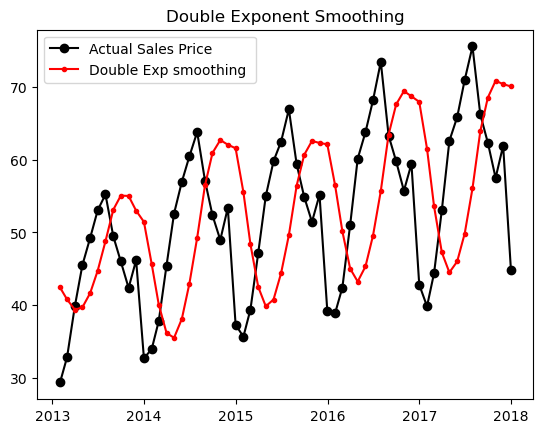

In [98]:
plt.plot(data,marker='o',color='black',label ='Actual Sales Price')
plt.plot(f_dexp,marker='.',color='red',label='Double Exp smoothing ')
plt.legend()
plt.title('Double Exponent Smoothing')

Double exponential Smoothing plot we can see that time series data has a trend  smoothing constatnt from the data to optimize the fitness of line.

# Bulid the models fro Triple exponents smoothings.plot the actual and forecasted data and write your interpretion

In [99]:
model = ExponentialSmoothing(data.values,trend='add',seasonal='add',seasonal_periods=12).fit()
model

In [100]:
f_texp= model.fittedvalues
f_texp

array([29.32447114, 33.17947803, 40.78500709, 47.73254239, 49.5878576 ,
       53.15830535, 57.01971758, 47.42944864, 45.32027353, 42.07659673,
       46.36863724, 30.33429094, 31.64831876, 37.6370658 , 45.73400462,
       53.30282951, 56.60982619, 60.83715989, 64.45095306, 55.95020211,
       53.03552429, 48.50202077, 52.95848393, 37.50845879, 36.40302311,
       39.52117792, 47.33665761, 55.01555971, 58.94270458, 63.64867714,
       66.518525  , 59.00924342, 55.32719017, 51.03471525, 55.43721539,
       39.33830957, 38.30354423, 42.6672507 , 50.37422927, 58.83495953,
       64.03182396, 67.7000347 , 72.12368133, 65.49605483, 59.41316085,
       55.88844358, 59.75246094, 43.59534603, 41.94321454, 43.77857245,
       52.29800667, 60.87846383, 66.46893595, 69.78302385, 74.88046455,
       67.6409442 , 62.26780161, 58.46718124, 61.57372448, 46.04983728])

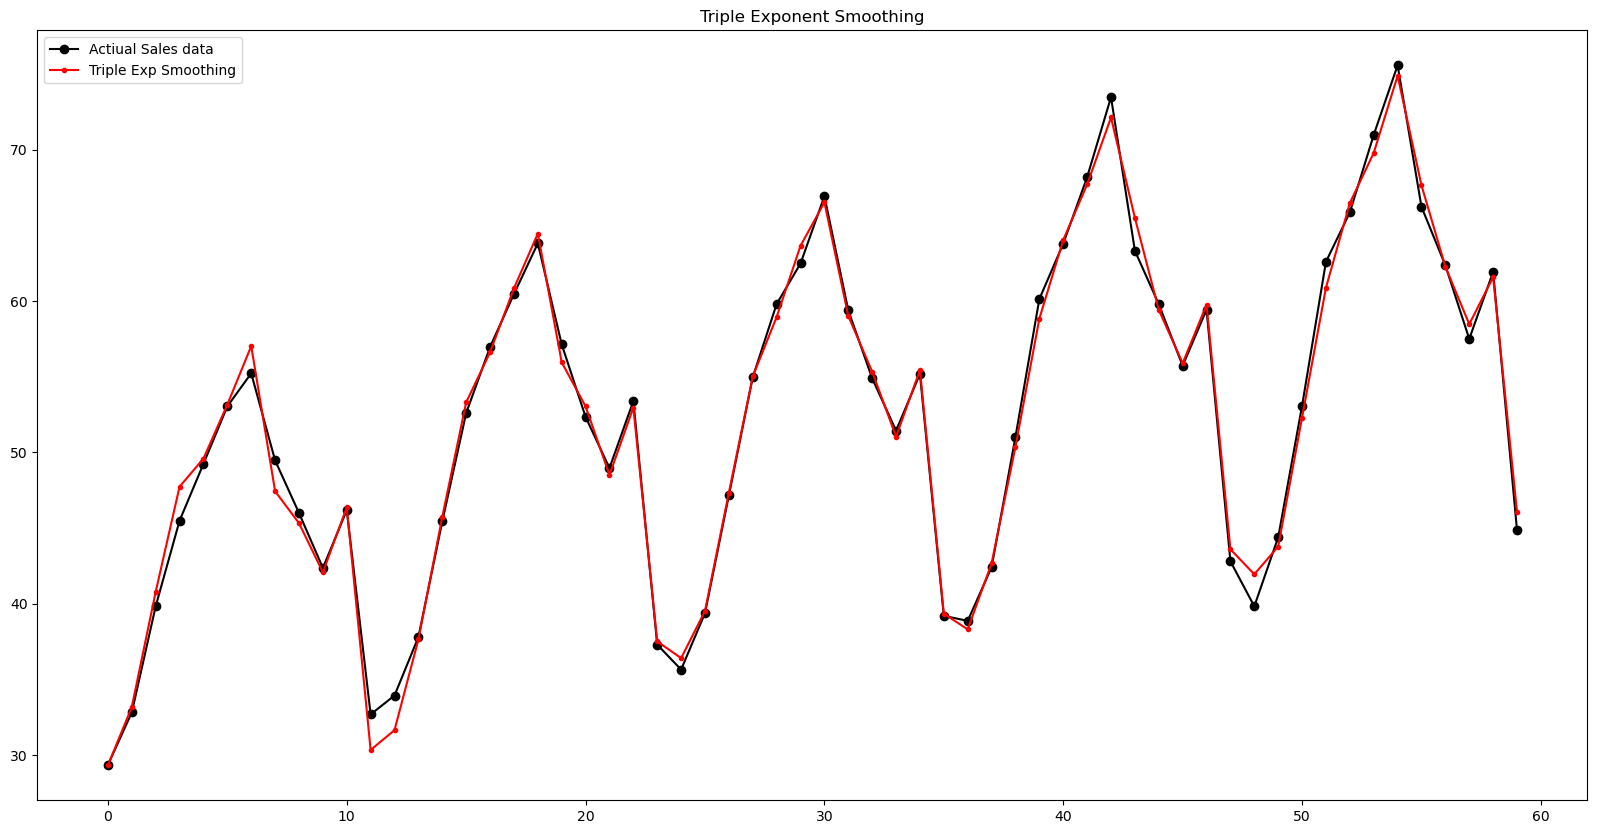

In [101]:
fig,ax = plt.subplots(figsize=(20,10))
plt.plot(data.values,marker='o',color='black',label='Actiual Sales data')
plt.plot(f_texp,marker='.',color='red',label='Triple Exp Smoothing')
plt.legend()

plt.title('Triple Exponent Smoothing');

In the above plot we can see the yearly seasonality with trend over the years. In this plot we can see the upward trend and yearly seasonality